In [1]:
%reload_ext autoreload
%autoreload 2

import socket
import os
if socket.gethostname().startswith('ax'):
    path_prefix = '/mnt/smb/locker/miller-locker/users/Tahereh'
    path_codes = '/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    sys.path.append('/mnt/smb/locker/miller-locker/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Illusions')
elif socket.gethostname().startswith('demo'):
    path_prefix = '/home/tahereh/engram/users/Tahereh'
    path_codes = '/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference/'
    os.chdir(path_codes)
    import sys
    sys.path.append(path_codes)
    
print(os.getcwd())

## Settings of results 
fontsize_text = 25
color_text = 'mediumseagreen'
fontsize_text = 12


resultsdir = os.path.join(path_prefix, 'Research/Results/Generative_Inference')

# get the labels for imagenet
from Stimuli.load_stimuli import labels_imagenet


/home/tahereh/engram/users/Tahereh/Codes/Public_Codes/Generative_Inference
Kernel running on local computer 'demo'.
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark']
image names:  ('self', 'image_name', 'image_original', 'cmap')


/home/tahereh/anaconda3/envs/pytorch2/lib/python3.8/site-packages/robustness-1.2.1.post2-py3.8.egg/robustness/train.py:24: UserWarning: Could not import amp.
  warnings.warn('Could not import amp.')


In [70]:
import torch

# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
# class Args:
#     def __init__(self) -> None:
#         self.model_arch = 'resnet50'
        
#         self.dataset_model = 'Places365' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
#         self.model_training ='advrobust_L2_eps_3.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
#         # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
#         # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
#         # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
#         # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
#         self.epoch_chkpnt = 98 #'full' #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
#         self.eval_dataset_identifier = 'vggface2_test'
#         self.batch_size = 32

# for face net: 'advrobust_L2_eps_0.50' checkpoint 100
class Args:
    def __init__(self) -> None:
        self.model_arch = 'resnet50'
        
        self.dataset_model = 'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        self.model_training ='advrobust_L2_eps_5.00' ##'advrobust_L2_eps_0.50' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_3.00' #'advrobust_Linf_eps_4.00' #'advrobust_L2_eps_0.50'  'advrobust_L2_eps_3.00' #
        
        # self.dataset_model =  'vggface2' #'imagenet' # 'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_0.50' ##'advrob
        
        # self.dataset_model =  'imagenetvggface2'#'vggface2' #'imagenet'
        # self.model_training ='advrobust_L2_eps_3.00' ##'advrob
        
        self.epoch_chkpnt = 100 #'full' #176 #100 #106 #100#'full' # 160 for vggface IncConfMSE #'full' 
        self.eval_dataset_identifier = 'vggface2_test'
        self.batch_size = 32
args = Args()

if args.dataset_model == 'vggface2':
    assert args.model_training == 'advrobust_L2_eps_0.50'
    args. norm_mean = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.norm_std = torch.tensor([0.5, 0.5, 0.5]).cuda()
    args.n_classes = 500
elif ('imagenet' in  args.dataset_model) or ('Places365' in args.dataset_model):
    args.norm_mean = torch.tensor([0.485, 0.456, 0.406]).cuda()
    args.norm_std = torch.tensor([0.229, 0.224, 0.225]).cuda()
    args.n_classes = 1000
else:
    raise ValueError(f"Dataset model {args.dataset_model} not supported yet")
          

#'vggface2'  'advrobust_L2_eps_0.50' 'full' 'vggface2_test' 32
# Load the model -----------------------------
model_args = {'model_arch': args.model_arch, 
              'model_training': args.model_training,
              'dataset': args.dataset_model,
              'epoch_chkpnt': args.epoch_chkpnt,
              'norm_mean': args.norm_mean,
              'norm_std': args.norm_std,
              'n_classes': args.n_classes,
            #   'inference': args.inference
              }

from Models import load_models
model, _ = load_models.load_models(model_args)
model = torch.nn.DataParallel(model).cuda()
_=model.eval()


args is a dictionary
get_dict_hash: dataset: imagenet, model_arch: resnet50
Loading model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_5.00/7d8147c9-77fc-4949-bafd-626e9312225e/100_checkpoint.pt
=> loading checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_5.00/7d8147c9-77fc-4949-bafd-626e9312225e/100_checkpoint.pt'
=> loaded checkpoint '/home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_5.00/7d8147c9-77fc-4949-bafd-626e9312225e/100_checkpoint.pt' (epoch 101)
****** Loaded model from /home/tahereh/engram/users/Tahereh/Codes/Perceptually_Aligned_Gradients/Training/TrainedModels/train_resnet50_imagenet_eps_5.00/7d8147c9-77fc-4949-bafd-626e9312225e/100_checkpoint.pt


In [109]:
## test the generative inference function
from Stimuli.load_stimuli import ImageLoader
from Inference.Generative_infernece import generative_inference

model_config = {'model': model, 'dataset_model': args.dataset_model, **model_args}



# Define the occlusion mask
height, width = 224, 224  # Assuming the input image is 224x224
mask_tensor = torch.zeros((height, width)).cuda()
occluded_start_x, occluded_start_y = 112, 112  # Adjust these coordinates to match your occlusion
occluded_end_x, occluded_end_y = 224, 224
mask_tensor[occluded_start_y:occluded_end_y, occluded_start_x:occluded_end_x] = 1

# Expand the mask to match the image dimensions (C, H, W)
mask_tensor = mask_tensor.unsqueeze(0).unsqueeze(0)  # Shape: (1, 1, H, W)

## pretty print the model_config
inference_config = {'loss_infer': 'GradModulation',#'ReverseDiffusion',#'IncreaseConfidence',# #'IncreaseConfidence', #'ReverseDiffusion', 
                    'loss_function': 'MSE',#'MSE',# #'CE', #'MSE', 
                    'n_itr':101, 
                    'eps': 10, #0.5, 
                    'step_size': 1, #3
                    'diffusion_noise_ratio': 0.01,#0.05, 
                    'initial_inference_noise_ratio': 0.003,#0.05, #0.1, 
                    'iterations_to_show': [0, 1, 2, 4, 8, 12, 16, 24, 32, 40, 48, 56, 72, 84, 96],
                    # 'iterations_to_show': [0, 1, 2, 4, 8, 16, 20, 32, 64, 80, 100, 128, 160, 180, 200, 240, 280, 320, 420, 520, 620, 720, 820, 920,],
                    'top_layer': 'all', #'layer4', #'avgpool', #'all',
                    'inference_normalization': 'off',
                    'recognition_normalization': 'off',
                    'misc_info': {'keep_grads': True, 'grad_modulation':mask_tensor
                        
                        }
                    }



# image_name = 'NeonCircles' #'NeonColorSaeedi' # 'NeonCircles'
# image, cmap = ImageLoader(args.dataset_model).load_image(image_name)

from PIL import Image
# read as PIL image from /home/tahereh/engram/users/Tahereh/Research/Data/Occlusion_monkey/morganPetroMuckli2016
image_path = '/home/tahereh/engram/users/Tahereh/Research/Data/Occlusion_monkey/morganPetroMuckli2016'
image_name = 'image_19_occ.png'
image = Image.open(os.path.join(image_path, image_name)).convert('RGB')
cmap = 'gray'

selected_inferred_patterns, perceived_categories, confidence_list, misc_info_dict = generative_inference(model_config, image, inference_config)
iteration_numbers = inference_config['iterations_to_show']
if inference_config['misc_info']['keep_grads']:
    selected_grad_patterns = misc_info_dict['grad_info']
else:
    selected_grad_patterns = []

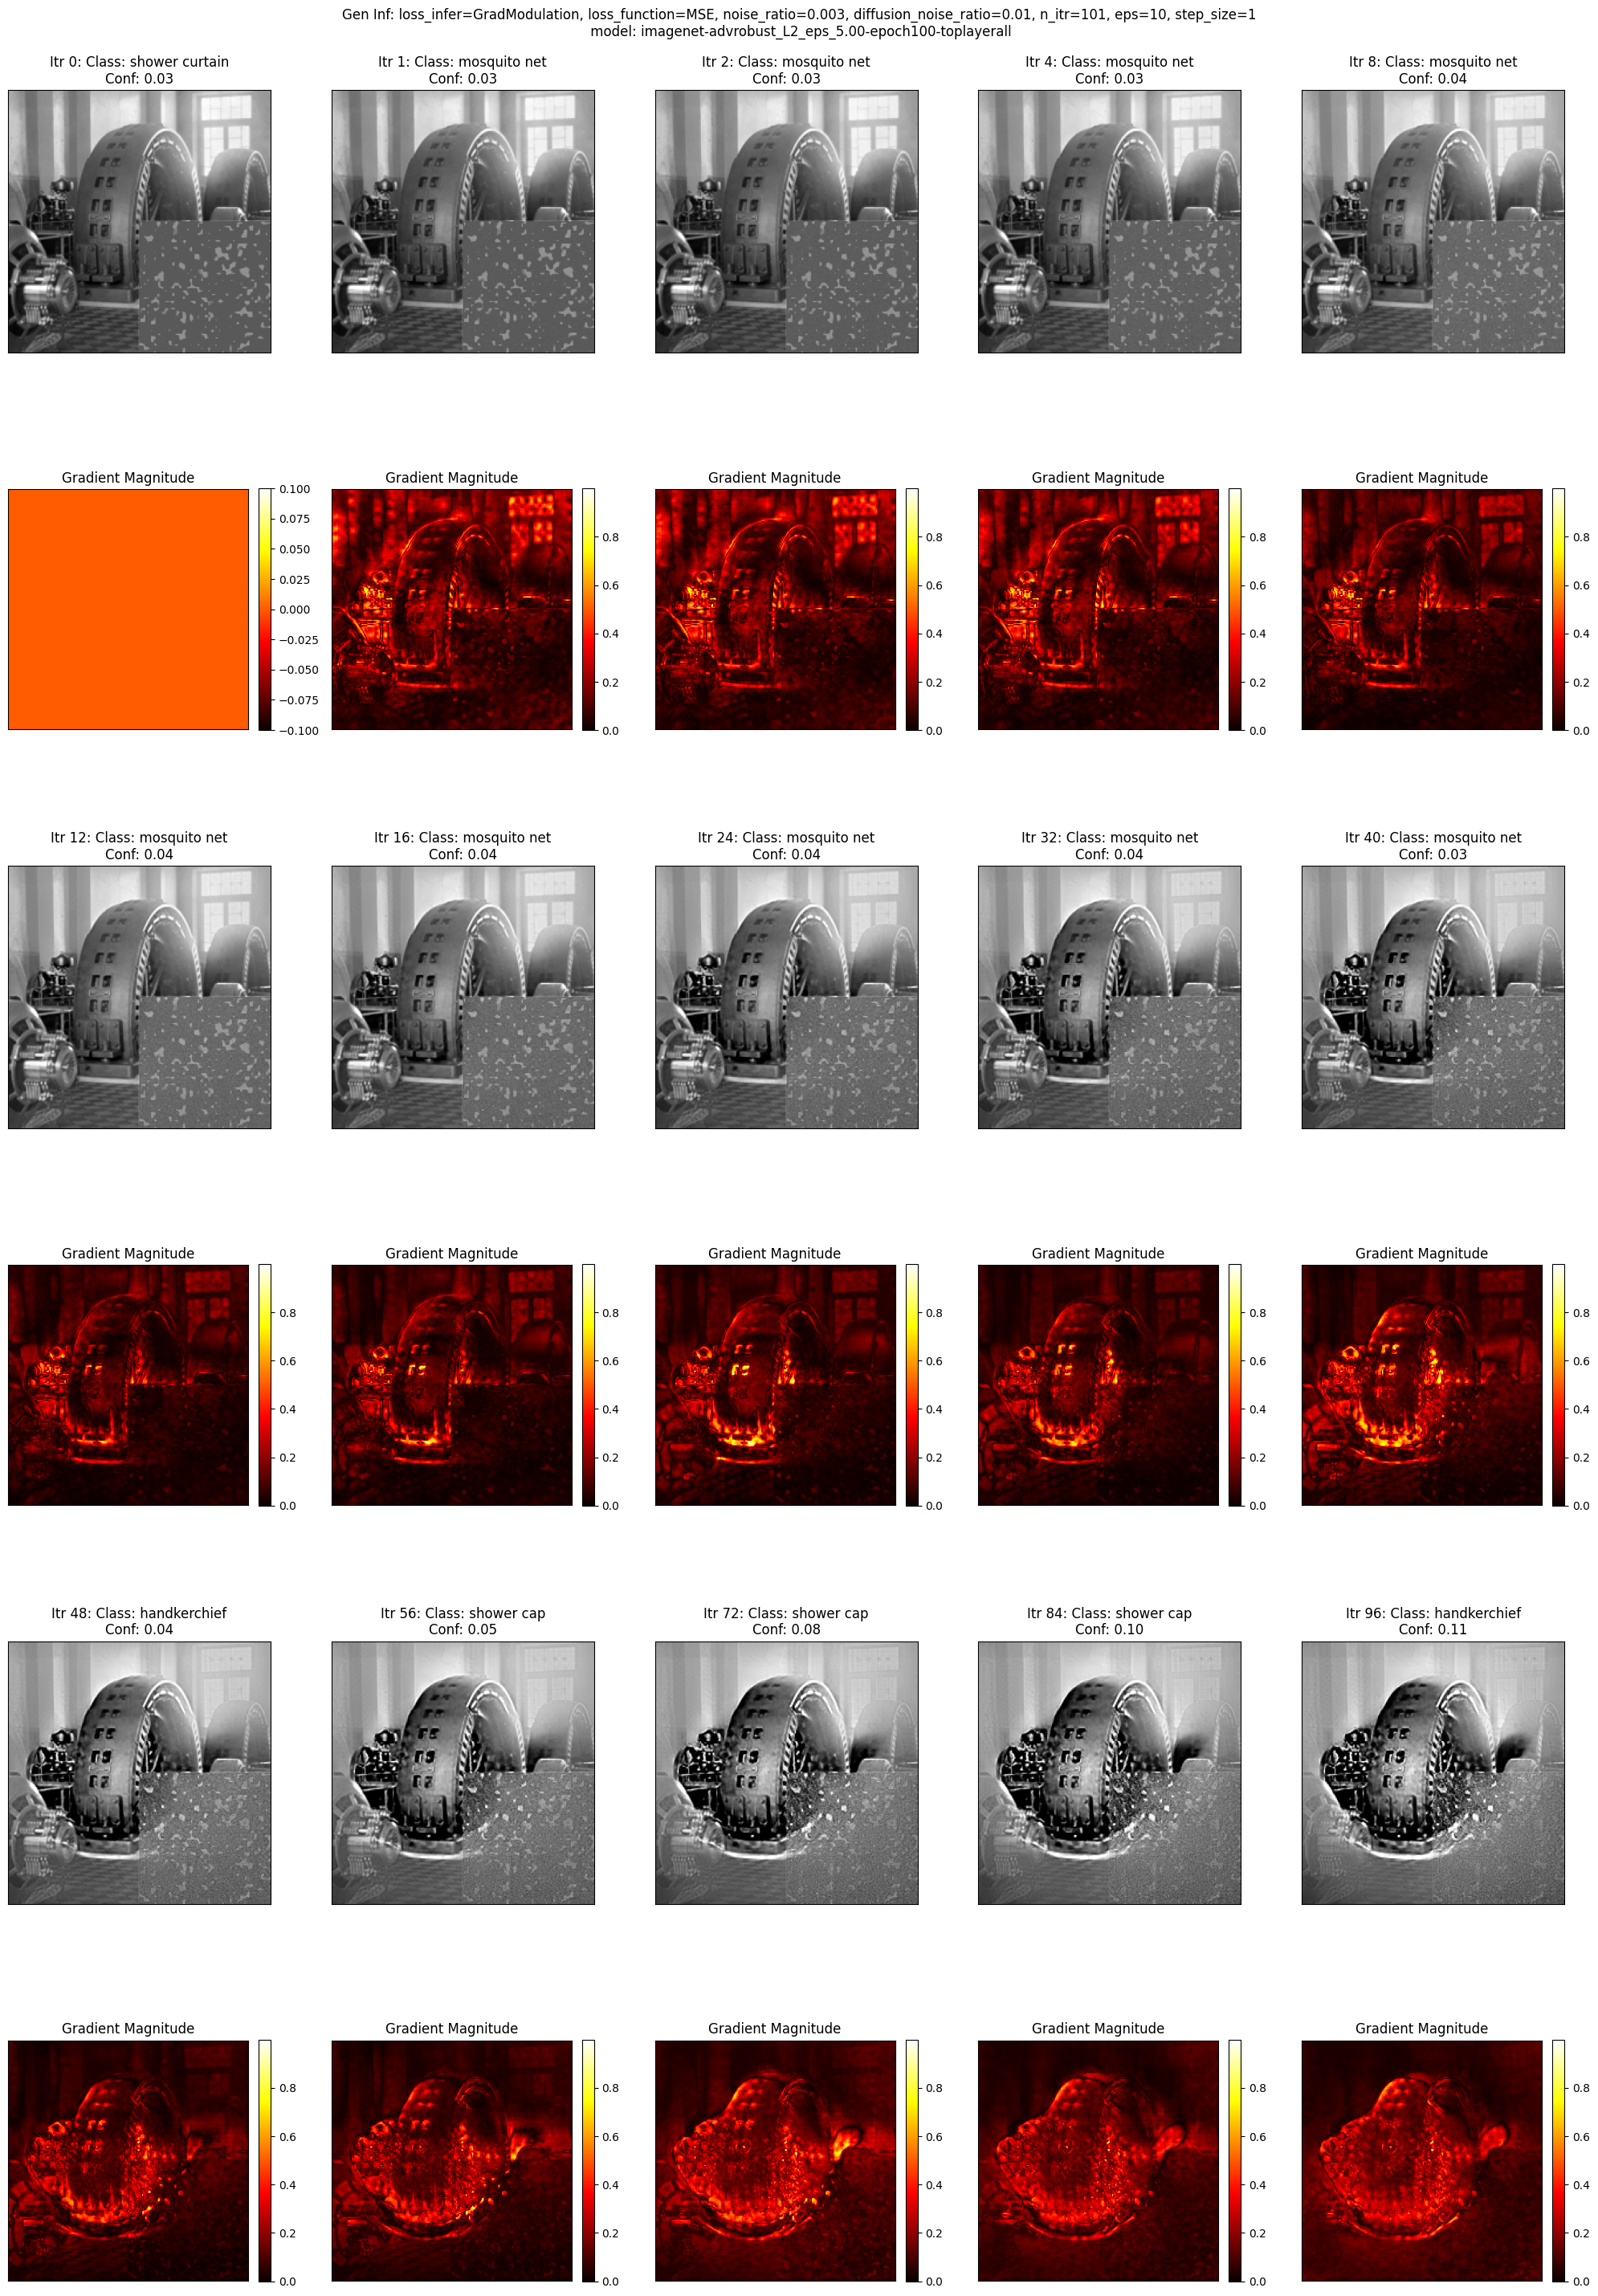

saved at: /home/tahereh/engram/users/Tahereh/Research/Results/Generative_Inference/imagenet-advrobust_L2_eps_5.00-100/image_19_occ.png_all_geninf_imagenet_advrobust_L2_eps_5.00_epoch100_GradModulation_MSE_noise_ratio0.003_diffusion_noise_ratio0.01_n_itr101_eps10_step_size1_confitr0_False_with_gradients.pdf


In [110]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

# show the images and gradients in a grid - now with 2 rows per pattern
n_cols = 5
n_pattern_rows = len(selected_inferred_patterns)//n_cols + (1 if len(selected_inferred_patterns)%n_cols > 0 else 0)
if n_pattern_rows == 0:
    n_pattern_rows = 1
# Double the rows to accommodate gradients below each image
n_total_rows = n_pattern_rows * 2
fig, axes = plt.subplots(n_total_rows, n_cols, figsize=[20, 5*n_pattern_rows * 2])

if model_config['dataset_model'] == 'vggface2':
    norm_mean = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.5,0.5,0.5]).view(-1, 1, 1).cuda()
elif model_config['dataset_model'] == 'imagenet' or model_config['dataset_model'] == 'imagenetvggface2':
    norm_mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1).cuda()
    norm_std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1).cuda()

for i in range(len(selected_inferred_patterns)):
    # Calculate positions for image and gradient
    row_idx = (i // n_cols) * 2  # Multiply by 2 to skip rows for gradients
    col_idx = i % n_cols
    
    # Get axes for both image and gradient
    if n_pattern_rows == 1:
        ax_img = axes[0] if n_cols == 1 else axes[col_idx]
        ax_grad = axes[1] if n_cols == 1 else axes[n_cols + col_idx]
    else:
        ax_img = axes[row_idx, col_idx]
        ax_grad = axes[row_idx + 1, col_idx]
        
    # Get the image and corresponding gradients
    image_to_compute = selected_inferred_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    gradients = selected_grad_patterns[i].squeeze(0).detach().cpu().numpy().transpose(1,2,0)
    
    # Normalize gradients for visualization
    grad_magnitude = np.sqrt(np.sum(gradients**2, axis=2))
    grad_normalized = (grad_magnitude - grad_magnitude.min()) / (grad_magnitude.max() - grad_magnitude.min() + 1e-8)
        
    
    predicted_emotion = 'N/A'
    confidence_emotion = 0
    first_itr_conf_got_high = 0
    emotion_detected = False
    color_title = 'black'
    
    # Plot image in top subplot
    if cmap == 'gray':
        image_to_compute = image_to_compute.mean(axis=2)
    ax_img.imshow(image_to_compute, cmap = cmap)
    # Plot gradient heatmap in bottom subplot
    gradient_plot = ax_grad.imshow(grad_normalized, cmap='hot')
    plt.colorbar(gradient_plot, ax=ax_grad, fraction=0.046, pad=0.04)
    
    # Set titles
    if model_config['dataset_model'] == 'imagenet':
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {labels_imagenet[perceived_categories[i]]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    else:
        ax_img.set_title(f'Itr {iteration_numbers[i]}: Class: {perceived_categories[i]}\nConf: {confidence_list[i]:.2f}', color=color_title)
    
    ax_grad.set_title('Gradient Magnitude')
    
    # Remove ticks from both subplots
    ax_img.set_xticks([])
    ax_img.set_yticks([])
    ax_grad.set_xticks([])
    ax_grad.set_yticks([])

fig.suptitle(f'Gen Inf: loss_infer={inference_config["loss_infer"]}, loss_function={inference_config["loss_function"]}, noise_ratio={inference_config["initial_inference_noise_ratio"]}, diffusion_noise_ratio={inference_config["diffusion_noise_ratio"]}, n_itr={inference_config["n_itr"]}, eps={inference_config["eps"]}, step_size={inference_config["step_size"]}\n model: {args.dataset_model}-{args.model_training}-epoch{args.epoch_chkpnt}-toplayer{inference_config["top_layer"]}')

# Remove empty axes
for i in range(n_total_rows):
    for j in range(n_cols):
        pattern_idx = (i//2) * n_cols + j
        if pattern_idx >= len(selected_inferred_patterns):
            if n_pattern_rows > 1:
                fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

# Save figure
figsave_dir = os.path.join(resultsdir, f'{args.dataset_model}-{args.model_training}-{args.epoch_chkpnt}/')
if not os.path.exists(figsave_dir):
    os.makedirs(figsave_dir)

fig_name = f'{image_name}_{inference_config["top_layer"]}_geninf_{model_config["dataset_model"]}_{model_config["model_training"]}_epoch{model_config["epoch_chkpnt"]}_{inference_config["loss_infer"]}_{inference_config["loss_function"]}_noise_ratio{inference_config["initial_inference_noise_ratio"]}_diffusion_noise_ratio{inference_config["diffusion_noise_ratio"]}_n_itr{inference_config["n_itr"]}_eps{inference_config["eps"]}_step_size{inference_config["step_size"]}'
fig_name = fig_name + f'_confitr{first_itr_conf_got_high}_{emotion_detected}_with_gradients'

instance_counter = 0
while os.path.exists(os.path.join(figsave_dir, fig_name+'.pdf')):
    print('file already exists, adding instance number')
    if 'instance' in fig_name:
        fig_name = fig_name.split('_instance')[0]
    fig_name = fig_name + f'_instance{instance_counter}'
    instance_counter += 1

fig.savefig(os.path.join(figsave_dir, fig_name+'.pdf'), dpi=300, bbox_inches='tight')
print('saved at:', os.path.join(figsave_dir, fig_name+'.pdf'))

# Save results dictionary
dict_results = {
    'model_config': model_config,
    'inference_config': inference_config,
    'selected_inferred_patterns': selected_inferred_patterns,
    'selected_grad_patterns': selected_grad_patterns,
    'perceived_categories': perceived_categories,
    'iteration_numbers': iteration_numbers,
}
np.save(os.path.join(figsave_dir, fig_name+'.npy'), dict_results)

In [20]:
cmap

'gray'

In [139]:
## Comparision between the two images
image_name1 = 'KanizsaSq'


image1, cmap1 = ImageLoader(args.dataset_model).load_image(image_name1)


selected_inferred_patterns1, perceived_categories1, confidence_list1, misc_info_dict1 = generative_inference(model_config, image1, inference_config)
image_name2 = 'KanizsaRealContours'
image2, cmap2 = ImageLoader(args.dataset_model).load_image(image_name2)
selected_inferred_patterns2, perceived_categories2, confidence_list2, misc_info_dict2 = generative_inference(model_config, image2, inference_config)
iteration_numbers = inference_config['iterations_to_show']


